In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from src.utils.helper import load_params

### Import Params 

In [2]:
params_dir = "config/params.yaml"

In [3]:
params = load_params(params_dir)

In [4]:
params

{'dataset_dir': 'data/raw/',
 'int32_columns': ['Year'],
 'float32_columns': ['NA_Sales',
  'EU_Sales',
  'JP_Sales',
  'Other_Sales',
  'Global_Sales'],
 'object_columns': ['Name', 'Platform', 'Genre', 'Publisher'],
 'label': 'Global_Sales',
 'predictors': ['Name',
  'Year',
  'Platform',
  'Genre',
  'Publisher',
  'NA_Sales',
  'EU_Sales',
  'JP_Sales',
  'Other_Sales'],
 'range_Year': [-1, 2020]}

### Load Train Set 

In [5]:
X_train = joblib.load("data/processed/X_train.pkl")
y_train = joblib.load("data/processed/y_train.pkl")

In [6]:
X_train.head()

,Name,Year,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
14303,Stacked with Daniel Negreanu,2006,PSP,Misc,Myelin Media,0.03,0.0,0.00,0.00
13455,National Geographic Panda (US sales),2008,DS,Simulation,Ubisoft,0.04,0.0,0.00,0.00
6724,Yakuza Zero: The Place of Oath,2015,PS3,Action,Sega,0.00,0.0,0.25,0.00
898,The Sims: Makin' Magic,2003,PC,Simulation,Electronic Arts,1.03,0.8,0.00,0.09
8484,Lufia: Curse of the Sinistrals,2010,DS,Role-Playing,Square Enix,0.12,0.0,0.03,0.01


In [7]:
y_train.head()

14303    0.03
13455    0.04
6724     0.25
898      1.92
8484     0.16
Name: Global_Sales, dtype: float64

In [8]:
data = pd.concat([X_train, y_train], axis=1)

In [9]:
data.head()

,Name,Year,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14303,Stacked with Daniel Negreanu,2006,PSP,Misc,Myelin Media,0.03,0.0,0.00,0.00,0.03
13455,National Geographic Panda (US sales),2008,DS,Simulation,Ubisoft,0.04,0.0,0.00,0.00,0.04
6724,Yakuza Zero: The Place of Oath,2015,PS3,Action,Sega,0.00,0.0,0.25,0.00,0.25
898,The Sims: Makin' Magic,2003,PC,Simulation,Electronic Arts,1.03,0.8,0.00,0.09,1.92
8484,Lufia: Curse of the Sinistrals,2010,DS,Role-Playing,Square Enix,0.12,0.0,0.03,0.01,0.16


### EDA

#### Check missing values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13278 entries, 14303 to 15795
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          13278 non-null  object 
 1   Year          13278 non-null  int64  
 2   Platform      13278 non-null  object 
 3   Genre         13278 non-null  object 
 4   Publisher     13225 non-null  object 
 5   NA_Sales      13278 non-null  float64
 6   EU_Sales      13278 non-null  float64
 7   JP_Sales      13278 non-null  float64
 8   Other_Sales   13278 non-null  float64
 9   Global_Sales  13278 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.1+ MB


In [11]:
# convert kembali -1 menjadi missing values

data.replace(-1, np.nan, inplace = True)

In [12]:
data.isna().sum()

Name              0
Year            223
Platform          0
Genre             0
Publisher        53
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

#### Check Statistics Information 

##### Skewness Data

In [13]:
# cek skewness
data.skew(numeric_only = True)

Year            -0.993041
NA_Sales        15.102188
EU_Sales        10.547538
JP_Sales        11.620364
Other_Sales     23.163605
Global_Sales    11.438121
dtype: float64

In [18]:
data.select_dtypes(np.number).columns.to_list()

['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

In [19]:
numeric_cols = data.select_dtypes(np.number).columns.to_list()

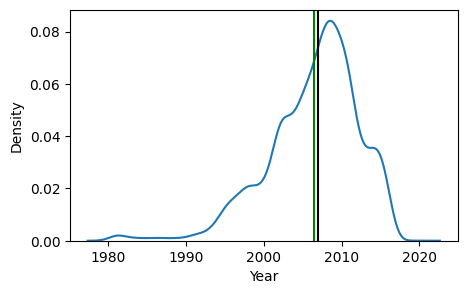

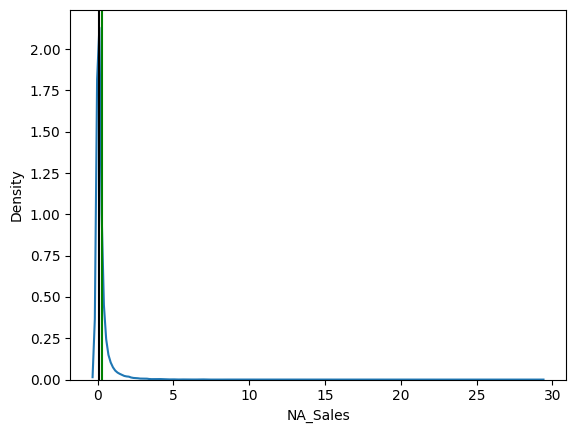

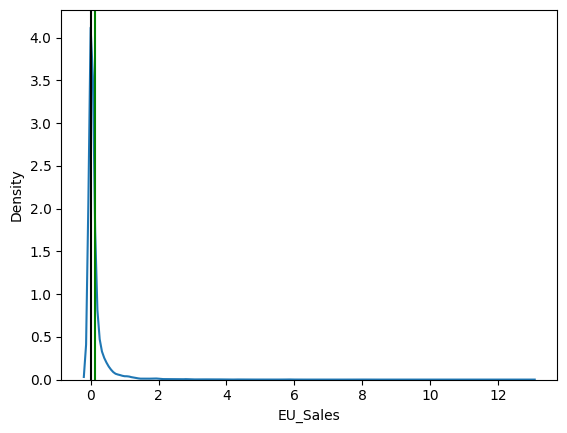

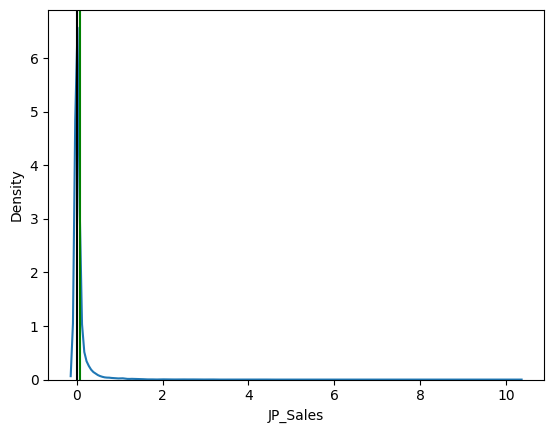

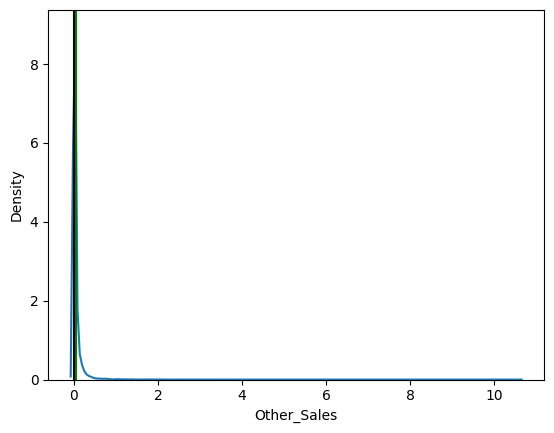

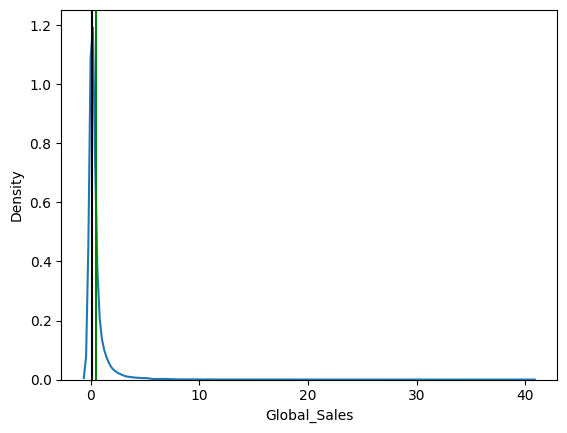

In [24]:
plt.figure(figsize=(5, 3))

for col in numeric_cols:
    sns.kdeplot(data = data, x = col)
    plt.axvline(data[col].mean(), 0, 1, color = "g")
    plt.axvline(data[col].median(), 0, 1, color = "k")
    plt.show()

##### Pearson Correlation 

<AxesSubplot: >

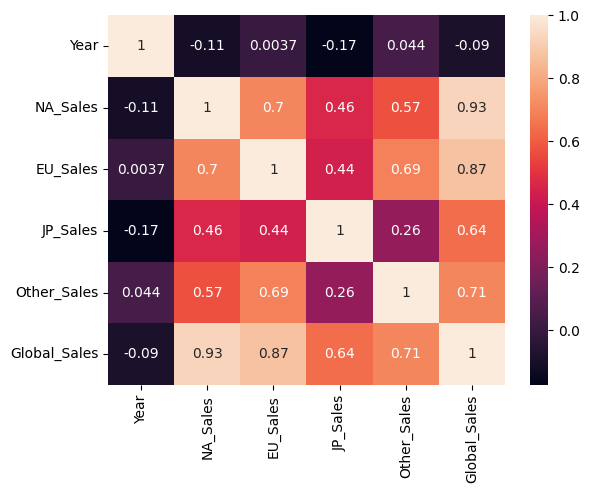

In [30]:
sns.heatmap(data.corr(numeric_only = True), annot=True)

##### Hypothesis Testing 

Kalau case Classification untuk ngelakuin Hypothesis testing itu dipisah berdasarkan class nya. ex: data untuk label class 1 dan data untuk label class 0.

Kalau di case Regression gimana ngelakuin Hypothesis testing nya??

In [31]:
import scipy.stats as scs

###### T Test untuk column NA_Sales

In [ ]:
# h0    = mean NA_Sales == mean Global_Sales
# h1    = mean NA_Sales != mean Global_Sales

In [32]:
scs.ttest_ind(data["NA_Sales"], data["Global_Sales"])

Ttest_indResult(statistic=-19.40529682749417, pvalue=2.63106320339224e-83)

In [33]:
scs.t.ppf(0.05, df = (len(data) - 2))

-1.6449684112335132

In [ ]:
# dengan nilai t-value < t-critical dan nilai p-value < 0.05 maka h0 di reject
# mean antara kelas 0 dan kelas 1 untuk pm25 statistically significant

###### T Test untuk column EU_Sales

In [37]:
scs.ttest_ind(data["EU_Sales"], data["Global_Sales"])

Ttest_indResult(statistic=-30.17905440466115, pvalue=9.393166404709506e-197)

###### T Test untuk column JP_Sales

In [38]:
scs.ttest_ind(data["JP_Sales"], data["Global_Sales"])

Ttest_indResult(statistic=-36.15559995207758, pvalue=1.8153844611580453e-279)

###### T Test untuk column Other_Sales

In [39]:
scs.ttest_ind(data["Other_Sales"], data["Global_Sales"])

Ttest_indResult(statistic=-39.20880218431809, pvalue=0.0)

#### Check Outliers

<AxesSubplot: xlabel='Year'>

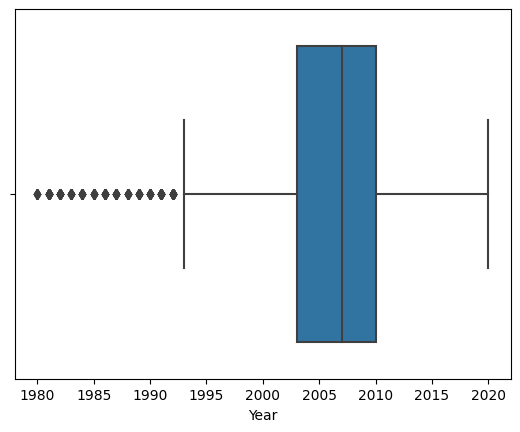

In [40]:
sns.boxplot(data = data, x = "Year")

<AxesSubplot: xlabel='NA_Sales'>

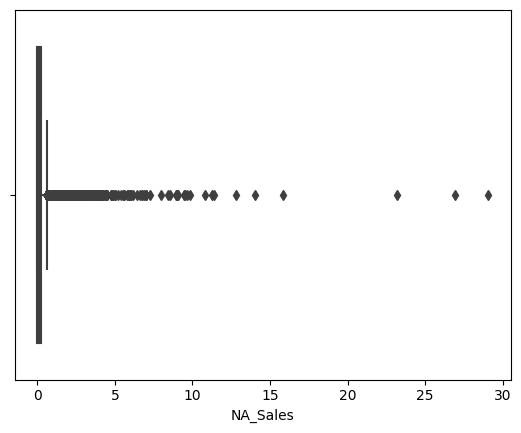

In [41]:
sns.boxplot(data = data, x = "NA_Sales")

<AxesSubplot: xlabel='EU_Sales'>

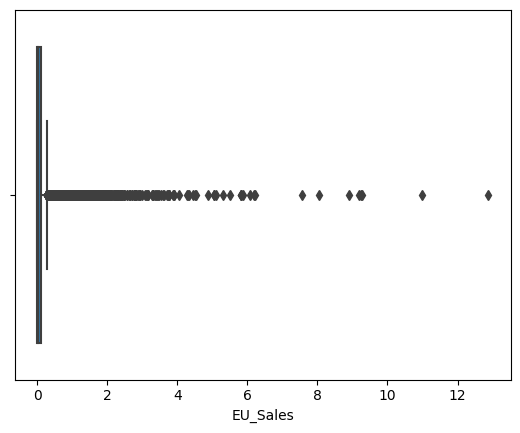

In [42]:
sns.boxplot(data = data, x = "EU_Sales")

<AxesSubplot: xlabel='JP_Sales'>

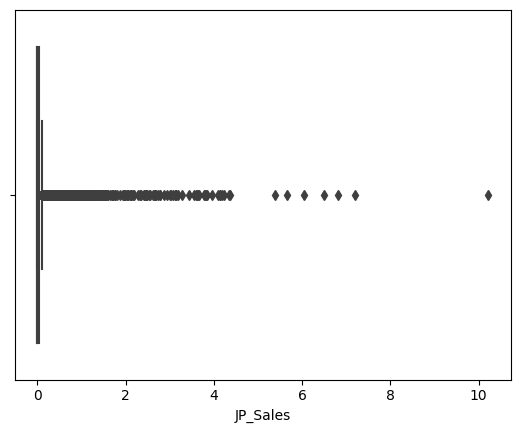

In [43]:
sns.boxplot(data = data, x = "JP_Sales")

<AxesSubplot: xlabel='Other_Sales'>

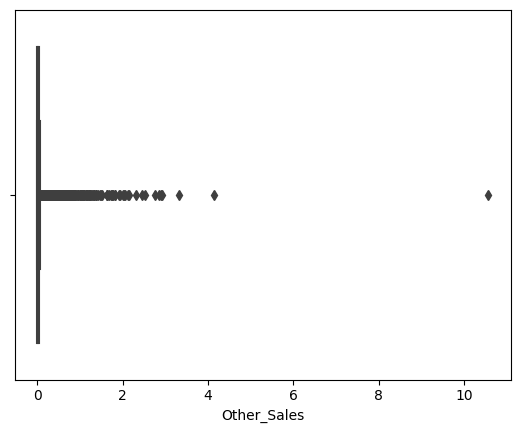

In [46]:
sns.boxplot(data = data, x = "Other_Sales")

<AxesSubplot: xlabel='Other_Sales', ylabel='Density'>

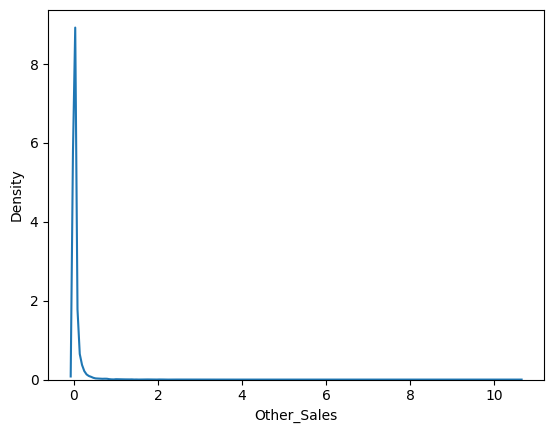

In [47]:
sns.kdeplot(data=data, x=data["Other_Sales"])

### Conclusion

1. Missing value handling
    - year : median / mode dari tahun
    - publisher : isi dengan value "UNKNOWN"
    
2. Treat outlier
    - remove outlier
    - transform menggunakan log